In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [450]:
%cd /content/gdrive/MyDrive/Dibimbing/FINAL PROJECT

/content/gdrive/MyDrive/Dibimbing/FINAL PROJECT


In [451]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [537]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [538]:
df['sl_no'].unique().size

215

In [539]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


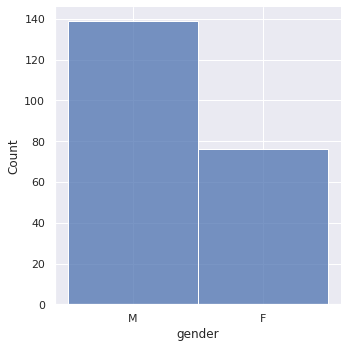

In [540]:
# draw histogram
sns.displot(data=df,
            x='gender',
            kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 21.5, 'UG specialisation')

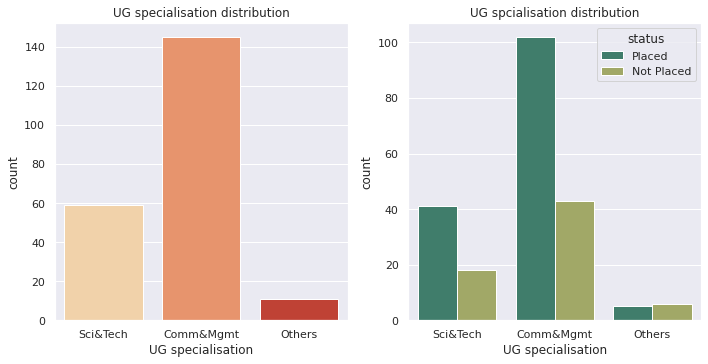

In [541]:
fig5=plt.figure(figsize=(10,5))

ax1 = fig5.add_subplot(121)

g = sns.countplot("degree_t" , data=df, ax=ax1,palette='OrRd')

ax2=fig5.add_subplot(122)

g=sns.countplot('degree_t',data=df,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('UG specialisation distribution')
ax1.set_xlabel('UG specialisation')
ax2.set_title('UG spcialisation distribution')
ax2.set_xlabel('UG specialisation')

Text(0.5, 1.0, 'Salary distribution for the batch')

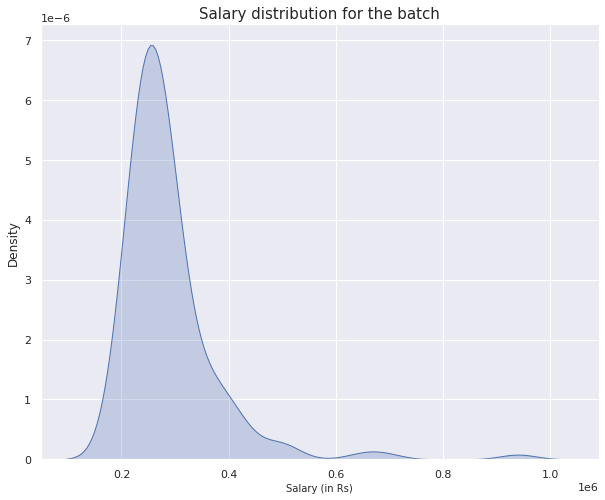

In [542]:
plt.figure(figsize=(10,8))
df_placed=df[df['salary']>0]
sns.kdeplot(df_placed['salary'],shade=True)
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [544]:
#As we can clearly see, the only missing values present are in the salary column.

In [545]:
df['salary'].fillna(0,inplace=True)
df['salary'].isna().any()

False

In [546]:
#replaced all the missing values with the median value
df['salary'].median()

240000.0

In [547]:
#Gender
df['gender']=df['gender'].map({'M':0,'F':1})

In [548]:
#OHE ssc_b and hsc_b
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [549]:
df['ssc_b']=df['ssc_b'].map({'Central':1,'Others':0})

In [550]:
df['hsc_b']=df['hsc_b'].map({'Central':1,'Others':0})

In [551]:
#hsc_s
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [552]:
#OHE hsc_s
df_subjects=pd.get_dummies(df['hsc_s'])
df=df.merge(df_subjects,on=df.index)

In [553]:
df.drop('key_0',axis=1,inplace=True)
df.drop('hsc_s',axis=1,inplace=True)

In [554]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'Arts', 'Commerce', 'Science'],
      dtype='object')

In [555]:
#degree_t
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [556]:
df_deg=pd.get_dummies(df['degree_t'])
df=df.merge(df_deg,on=df.index)

In [557]:
df.drop('key_0',axis=1,inplace=True)
df.drop('degree_t',axis=1,inplace=True)

In [558]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p',
       'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary',
       'Arts', 'Commerce', 'Science', 'Comm&Mgmt', 'Others', 'Sci&Tech'],
      dtype='object')

In [559]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,0,67.00,0,91.00,0,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,0,0,1
1,2,0,79.33,1,78.33,0,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,0,1,0,0,1
2,3,0,65.00,1,68.00,1,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,0,0,1,0,0
3,4,0,56.00,1,52.00,1,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,0,1,0,0,1
4,5,0,85.80,1,73.60,1,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,0,82.00,0,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000.0,0,1,0,1,0,0
211,212,0,58.00,0,60.00,0,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0,0,1,0,0,1
212,213,0,67.00,0,67.00,0,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,0,1,0,1,0,0
213,214,1,74.00,0,66.00,0,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,1,0,1,0,0


In [560]:
#workex column tells us if a student has any work experience prior to joining the MBA programme Yes = 1 No = 0
df['workex']=df['workex'].map({'Yes':1,'No':0})
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,0,67.00,0,91.00,0,58.00,0,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,0,0,1
1,2,0,79.33,1,78.33,0,77.48,1,86.5,Mkt&Fin,66.28,Placed,200000.0,0,0,1,0,0,1
2,3,0,65.00,1,68.00,1,64.00,0,75.0,Mkt&Fin,57.80,Placed,250000.0,1,0,0,1,0,0
3,4,0,56.00,1,52.00,1,52.00,0,66.0,Mkt&HR,59.43,Not Placed,0.0,0,0,1,0,0,1
4,5,0,85.80,1,73.60,1,73.30,0,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,0,1,0,0


In [561]:
#specialisation column tells us about the type of MBA program the student is currently enrolled in
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [562]:
#OHE
df['specialisation']=df['specialisation'].map({'Mkt&Fin':1,'Mkt&HR':0})

In [563]:
#status column tells us whether the student got placed in the placement program. This is the target variable. Placed = 1 Not Placed = 0
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [564]:
df['status']=df['status'].map({'Placed':1,'Not Placed':0})

In [565]:
#ssc_p , hsc_p,degree_p, mba_p, etest_p
df.loc[df['ssc_p']<=60,'ssc_p_c']=3
df.loc[(df['ssc_p']>60) & (df['ssc_p']<81),'ssc_p_c']=2
df.loc[(df['ssc_p']>80)& (df['ssc_p']<101),'ssc_p_c']=1

df.loc[df['hsc_p']<=60,'hsc_p_c']=3
df.loc[(df['hsc_p']>60) & (df['hsc_p']<81),'hsc_p_c']=2
df.loc[(df['hsc_p']>80)& (df['hsc_p']<101),'hsc_p_c']=1


df.loc[df['degree_p']<=60,'degree_p_c']=3
df.loc[(df['degree_p']>60) & (df['degree_p']<81),'degree_p_c']=2
df.loc[(df['degree_p']>80)& (df['degree_p']<101),'degree_p_c']=1

df.loc[df['mba_p']<=60,'mba_p_c']=3
df.loc[(df['mba_p']>60) & (df['mba_p']<81),'mba_p_c']=2
df.loc[(df['mba_p']>80)& (df['mba_p']<101),'mba_p_c']=1

df.loc[df['etest_p']<=60,'etest_p_c']=3
df.loc[(df['etest_p']>60) & (df['etest_p']<81),'etest_p_c']=2
df.loc[(df['etest_p']>80)& (df['etest_p']<101),'etest_p_c']=1

qual_type=['ssc_p','hsc_p','degree_p','mba_p','etest_p']

for qual in qual_type:
    df.drop(qual,axis=1,inplace=True)

In [566]:
df.columns

Index(['sl_no', 'gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation',
       'status', 'salary', 'Arts', 'Commerce', 'Science', 'Comm&Mgmt',
       'Others', 'Sci&Tech', 'ssc_p_c', 'hsc_p_c', 'degree_p_c', 'mba_p_c',
       'etest_p_c'],
      dtype='object')

In [567]:
df.head()

,sl_no,gender,ssc_b,hsc_b,workex,specialisation,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c
0,1,0,0,0,0,0,1,270000.0,0,1,0,0,0,1,2.0,1.0,3.0,3.0,3.0
1,2,0,1,0,1,1,1,200000.0,0,0,1,0,0,1,2.0,2.0,2.0,2.0,1.0
2,3,0,1,1,0,1,1,250000.0,1,0,0,1,0,0,2.0,2.0,2.0,3.0,2.0
3,4,0,1,1,0,0,0,0.0,0,0,1,0,0,1,3.0,3.0,3.0,3.0,2.0
4,5,0,1,1,0,1,1,425000.0,0,1,0,1,0,0,1.0,2.0,2.0,3.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


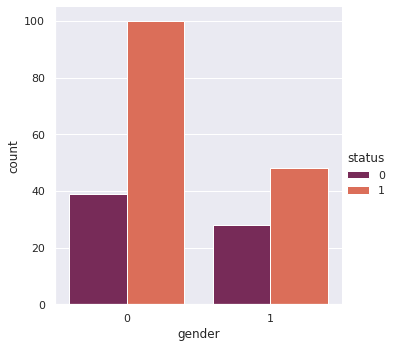

In [568]:
sns.catplot('gender',data=df,kind='count',hue='status',palette='rocket')

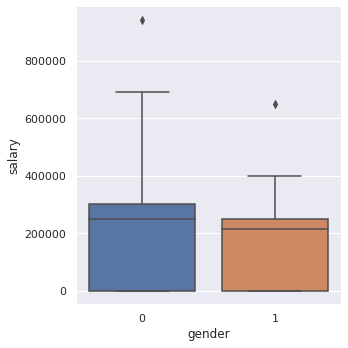

In [569]:
# draw boxplot
sns.catplot(data=df,
            x='gender',
            y='salary',
            kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


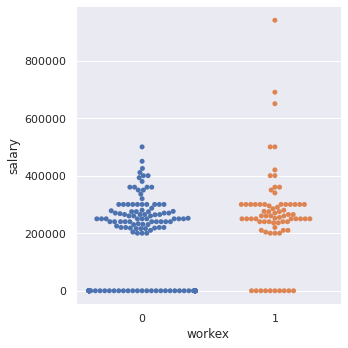

In [570]:
# draw swarm plot
sns.catplot(data=df,
            x='workex',
            y='salary',
            kind='swarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 21.5, 'MBA percentage class')

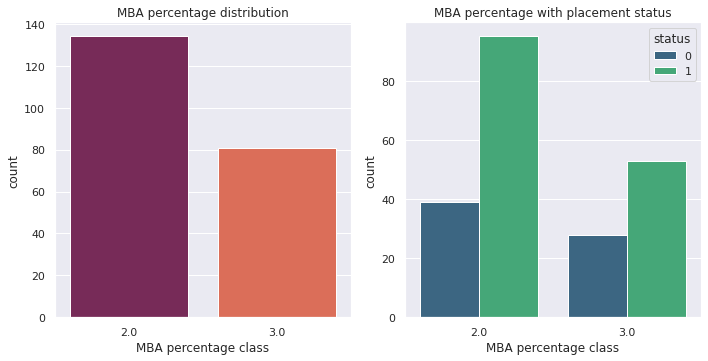

In [571]:
fig1=plt.figure(figsize=(10,5))

ax1 = fig1.add_subplot(121)

g = sns.countplot("mba_p_c" , data=df, ax=ax1,palette='rocket')

ax2=fig1.add_subplot(122)

g=sns.countplot('mba_p_c',data=df,ax=ax2,hue='status',palette='viridis')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('MBA percentage distribution')
ax1.set_xlabel('MBA percentage class')
ax2.set_title('MBA percentage with placement status')
ax2.set_xlabel('MBA percentage class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 25.96, '10th Percentage class')

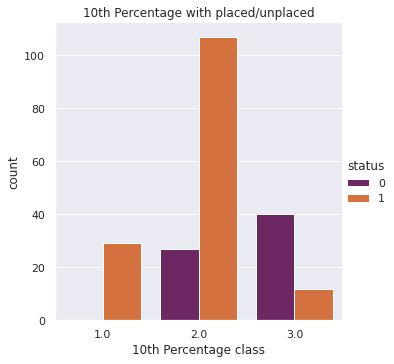

In [572]:
sns.catplot('ssc_p_c',data=df,kind='count',hue='status',palette='inferno')
plt.title('10th Percentage with placed/unplaced')
plt.xlabel('10th Percentage class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 25.96, '12th Percentage class')

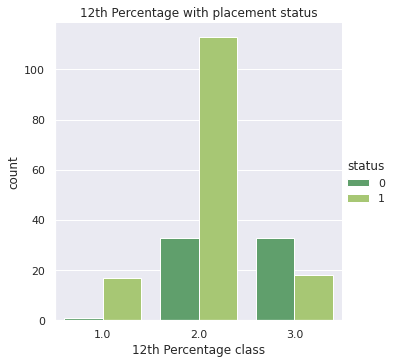

In [573]:
sns.catplot('hsc_p_c',data=df,kind='count',hue='status',palette='summer')
plt.title('12th Percentage with placement status')
plt.xlabel('12th Percentage class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 25.96, 'UG Percentage class')

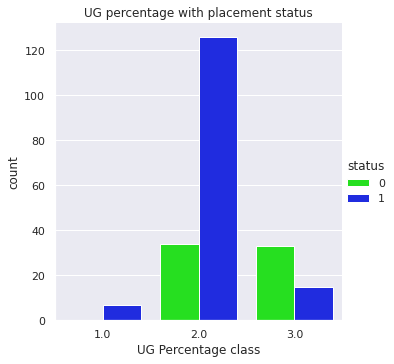

In [574]:
sns.catplot('degree_p_c',data=df,kind='count',hue='status',palette='hsv')
plt.title('UG percentage with placement status')
plt.xlabel('UG Percentage class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 25.96, 'E test precentage class')

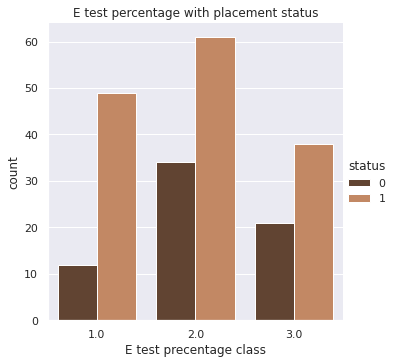

In [575]:
sns.catplot('etest_p_c',data=df,kind='count',hue='status',palette='copper')
plt.title('E test percentage with placement status')
plt.xlabel('E test precentage class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 25.96, 'workex')

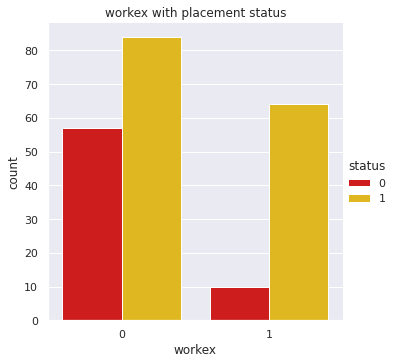

In [616]:
sns.catplot('workex',data=df,kind='count',hue='status',palette='hot')
plt.title('workex with placement status')
plt.xlabel('workex')

In [576]:
# Method to get summary statistics for numerical columns
df.describe()

,sl_no,gender,ssc_b,hsc_b,workex,specialisation,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.353488,0.539535,0.390698,0.344186,0.558140,0.688372,198702.325581,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419,2.106977,2.153488,2.190698,2.376744,1.990698
std,62.209324,0.479168,0.499598,0.489045,0.476211,0.497767,0.464240,154780.926716,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262,0.605811,0.546590,0.469546,0.485701,0.748773
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,54.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,108.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,240000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,161.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,282500.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,215.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,940000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [577]:
# Method to calculate the correlation matrix for all of the numerical columns
# default is pearson correlation
df_corr = df.corr()
df_corr

,sl_no,gender,ssc_b,hsc_b,workex,specialisation,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c
sl_no,1.000000,-0.074306,-0.027214,-0.116887,0.059151,-0.046630,-0.026859,0.002543,0.014626,-0.024463,0.018201,-0.039982,0.066666,0.009069,0.048729,0.070637,0.125900,-0.017940,-0.028591
gender,-0.074306,1.000000,0.019429,0.065945,-0.085153,-0.106160,-0.090670,-0.143110,0.093246,0.001087,-0.042682,0.036215,0.093246,-0.084072,-0.002096,0.023817,-0.155624,-0.233563,0.126425
ssc_b,-0.027214,0.019429,1.000000,0.605883,0.040744,-0.051565,-0.037297,-0.034594,0.002758,0.056671,-0.058505,0.094939,0.002758,-0.101060,0.101756,-0.116442,0.077271,0.044247,-0.023995
hsc_b,-0.116887,0.065945,0.605883,1.000000,-0.038357,0.002232,-0.016945,-0.011544,0.116920,0.073522,-0.126446,0.027440,0.116920,-0.086548,0.031765,-0.033093,0.060671,0.006954,0.022733
workex,0.059151,-0.085153,0.040744,-0.038357,1.000000,0.191174,0.276060,0.298285,0.053939,-0.056719,0.033270,-0.102517,0.009507,0.102962,-0.112027,-0.060287,-0.065027,-0.118775,-0.043399
specialisation,-0.046630,-0.106160,-0.051565,0.002232,0.191174,1.000000,0.250655,0.275766,0.079085,0.129985,-0.166639,0.101331,-0.090948,-0.061503,-0.152438,-0.213290,-0.257586,-0.100686,-0.186604
status,-0.026859,-0.090670,-0.037297,-0.016945,0.276060,0.250655,1.000000,0.865774,-0.071653,0.024414,0.007279,0.046849,-0.117232,0.008688,-0.545521,-0.399915,-0.433528,-0.057160,-0.129365
salary,0.002543,-0.143110,-0.034594,-0.011544,0.298285,0.275766,0.865774,1.000000,-0.094836,0.015239,0.026890,-0.025186,-0.107139,0.079351,-0.501494,-0.344725,-0.376703,-0.124372,-0.186181
Arts,0.014626,0.093246,0.002758,0.116920,0.053939,0.079085,-0.071653,-0.094836,1.000000,-0.244411,-0.198926,-0.018858,0.329323,-0.142806,0.203390,0.050775,0.130788,0.080847,0.059409
Commerce,-0.024463,0.001087,0.056671,0.073522,-0.056719,0.129985,0.024414,0.015239,-0.244411,1.000000,-0.901673,0.651804,-0.202135,-0.584673,0.060283,-0.245012,0.068621,0.008225,0.025575


In [578]:
# We can also calculate the correlation using spearman method (non linear)
df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

,sl_no,gender,ssc_b,hsc_b,workex,specialisation,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c
sl_no,1.000000,-0.074306,-0.027214,-0.116887,0.059151,-0.046630,-0.026859,0.004418,0.014626,-0.024463,0.018201,-0.039982,0.066666,0.009069,0.048467,0.069325,0.126716,-0.017940,-0.029001
gender,-0.074306,1.000000,0.019429,0.065945,-0.085153,-0.106160,-0.090670,-0.190203,0.093246,0.001087,-0.042682,0.036215,0.093246,-0.084072,-0.004825,0.027136,-0.145943,-0.233563,0.126537
ssc_b,-0.027214,0.019429,1.000000,0.605883,0.040744,-0.051565,-0.037297,-0.056783,0.002758,0.056671,-0.058505,0.094939,0.002758,-0.101060,0.095695,-0.121975,0.064543,0.044247,-0.024176
hsc_b,-0.116887,0.065945,0.605883,1.000000,-0.038357,0.002232,-0.016945,-0.026311,0.116920,0.073522,-0.126446,0.027440,0.116920,-0.086548,0.026581,-0.044282,0.055519,0.006954,0.023051
workex,0.059151,-0.085153,0.040744,-0.038357,1.000000,0.191174,0.276060,0.269397,0.053939,-0.056719,0.033270,-0.102517,0.009507,0.102962,-0.113585,-0.067396,-0.068959,-0.118775,-0.043624
specialisation,-0.046630,-0.106160,-0.051565,0.002232,0.191174,1.000000,0.250655,0.258267,0.079085,0.129985,-0.166639,0.101331,-0.090948,-0.061503,-0.154675,-0.213023,-0.261804,-0.100686,-0.187162
status,-0.026859,-0.090670,-0.037297,-0.016945,0.276060,0.250655,1.000000,0.815544,-0.071653,0.024414,0.007279,0.046849,-0.117232,0.008688,-0.554289,-0.406912,-0.438592,-0.057160,-0.129739
salary,0.004418,-0.190203,-0.056783,-0.026311,0.269397,0.258267,0.815544,1.000000,-0.115663,0.021360,0.029991,-0.056742,-0.088519,0.103294,-0.510017,-0.341516,-0.387685,-0.119096,-0.198720
Arts,0.014626,0.093246,0.002758,0.116920,0.053939,0.079085,-0.071653,-0.115663,1.000000,-0.244411,-0.198926,-0.018858,0.329323,-0.142806,0.207200,0.054109,0.131902,0.080847,0.059795
Commerce,-0.024463,0.001087,0.056671,0.073522,-0.056719,0.129985,0.024414,0.021360,-0.244411,1.000000,-0.901673,0.651804,-0.202135,-0.584673,0.052902,-0.241767,0.072231,0.008225,0.025419


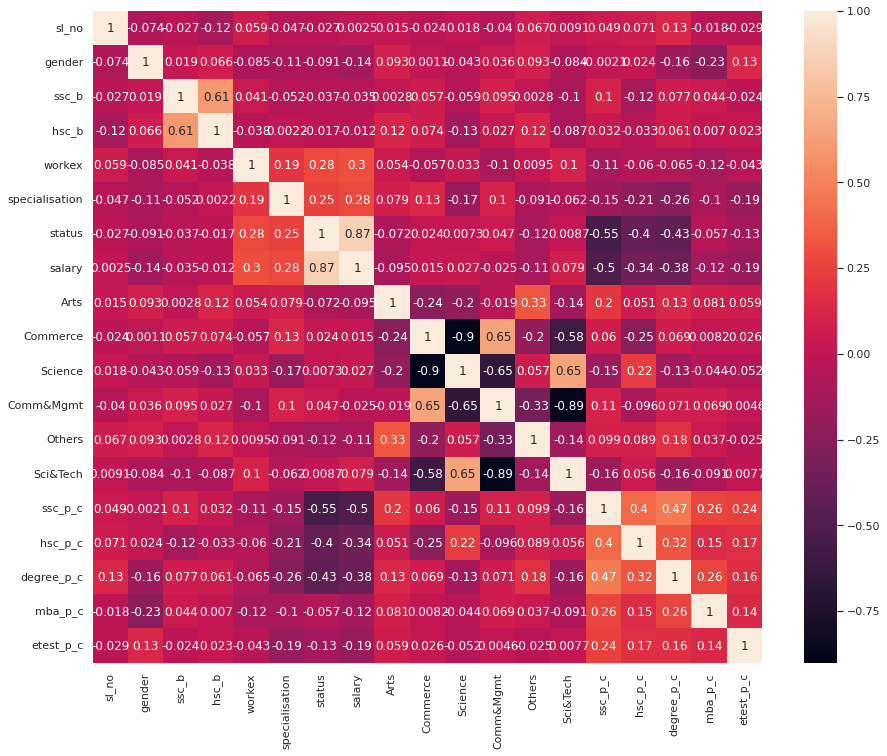

In [579]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True)

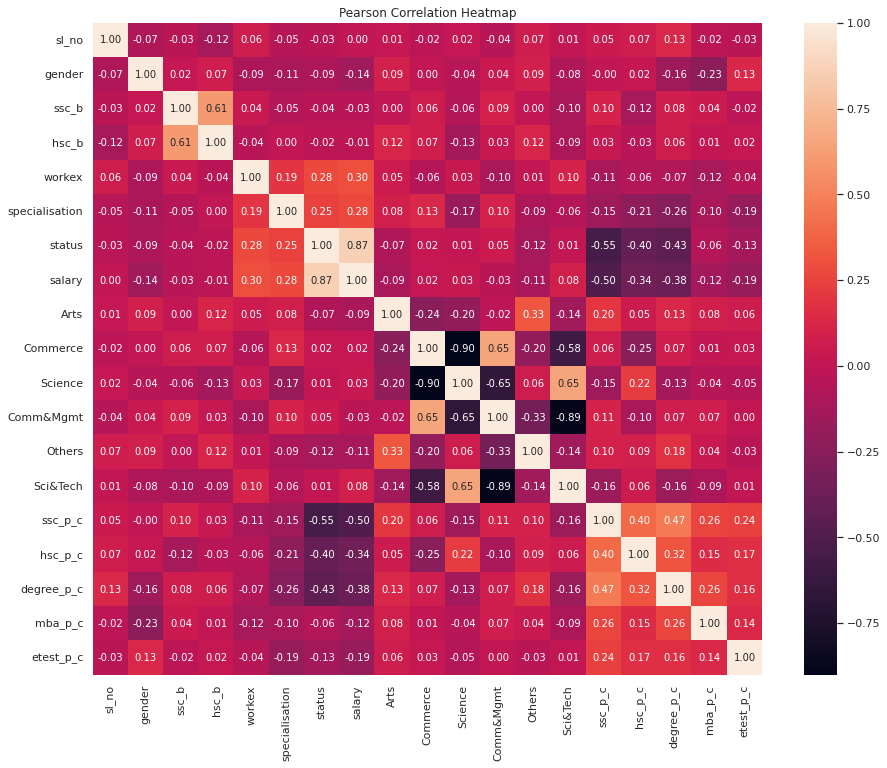

In [580]:
# PEARSON CORR HEATMAP
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

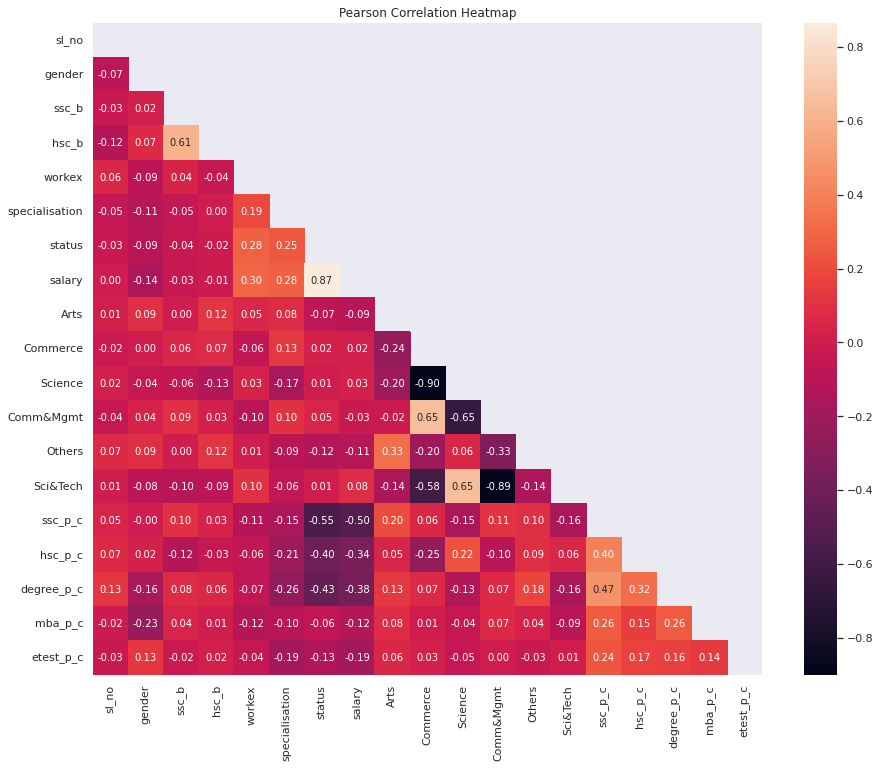

In [581]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

In [582]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# import graph library
import matplotlib.pyplot as plt

# import statistic library
from scipy import stats
import statsmodels.api as sm

In [583]:
df

,sl_no,gender,ssc_b,hsc_b,workex,specialisation,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c
0,1,0,0,0,0,0,1,270000.0,0,1,0,0,0,1,2.0,1.0,3.0,3.0,3.0
1,2,0,1,0,1,1,1,200000.0,0,0,1,0,0,1,2.0,2.0,2.0,2.0,1.0
2,3,0,1,1,0,1,1,250000.0,1,0,0,1,0,0,2.0,2.0,2.0,3.0,2.0
3,4,0,1,1,0,0,0,0.0,0,0,1,0,0,1,3.0,3.0,3.0,3.0,2.0
4,5,0,1,1,0,1,1,425000.0,0,1,0,1,0,0,1.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,0,0,0,1,1,400000.0,0,1,0,1,0,0,1.0,1.0,2.0,2.0,1.0
211,212,0,0,0,0,1,1,275000.0,0,0,1,0,0,1,3.0,3.0,2.0,3.0,2.0
212,213,0,0,0,1,1,1,295000.0,0,1,0,1,0,0,2.0,2.0,2.0,2.0,3.0
213,214,1,0,0,0,0,1,204000.0,0,1,0,1,0,0,2.0,2.0,3.0,2.0,2.0


**RIDGE REGRESSION**

In [584]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = df_corr.drop(columns='status').to_numpy()
y = df_corr[['status']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [585]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [586]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=10, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [587]:
# the complete results
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001739,0.002115,0.000413,0.000110,1e-06,{'alpha': 1e-06},-0.906425,-1.069513,-1.133107,-0.786575,-1.620543,-4.311344,-0.271986,-0.776265,-1.382878,-0.202093,-1.246073,1.103844,10
1,0.000634,0.000020,0.000323,0.000018,1e-05,{'alpha': 1e-05},-0.905510,-1.066772,-1.131300,-0.786125,-1.616052,-4.245894,-0.271945,-0.775333,-1.378715,-0.202098,-1.237974,1.085634,9
2,0.000752,0.000269,0.000341,0.000029,0.0001,{'alpha': 0.0001},-0.896473,-1.040067,-1.113551,-0.781669,-1.572462,-3.686287,-0.271532,-0.766155,-1.338525,-0.202143,-1.166886,0.931383,8
3,0.000702,0.000106,0.000345,0.000047,0.001,{'alpha': 0.001},-0.816417,-0.829162,-0.962994,-0.741188,-1.238156,-1.590182,-0.267464,-0.686600,-1.042062,-0.202588,-0.837681,0.393098,7
4,0.000652,0.000032,0.000338,0.000037,0.01,{'alpha': 0.01},-0.462917,-0.240497,-0.416045,-0.538501,-0.405182,-0.233774,-0.231716,-0.370216,-0.373178,-0.206962,-0.347899,0.107954,6
5,0.000694,0.000136,0.000335,0.000025,0.1,{'alpha': 0.1},-0.150582,-0.057457,-0.058440,-0.334481,-0.138430,-0.000305,-0.068877,-0.144274,-0.100389,-0.243294,-0.129653,0.093361,1
6,0.000633,0.000018,0.000326,0.000019,1,{'alpha': 1},-0.033632,-0.138762,-0.053484,-0.239035,-0.066362,-0.039053,-0.192574,-0.097446,-0.056296,-0.407695,-0.132434,0.112646,2
7,0.000655,0.000042,0.000336,0.000038,5,{'alpha': 5},-0.134808,-0.120475,-0.125374,-0.133449,-0.032217,-0.069142,-0.477983,-0.086248,-0.257070,-0.660067,-0.209683,0.192365,3
8,0.000656,0.000072,0.000324,0.000015,10,{'alpha': 10},-0.202468,-0.097250,-0.185412,-0.093001,-0.083965,-0.091689,-0.613668,-0.073221,-0.363192,-0.782744,-0.258661,0.237997,4
9,0.000659,0.000050,0.000328,0.000022,20,{'alpha': 20},-0.263177,-0.073791,-0.241531,-0.067788,-0.130158,-0.113271,-0.725200,-0.056833,-0.455696,-0.884106,-0.301155,0.279090,5


In [588]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-1.246073,10
1,{'alpha': 1e-05},-1.237974,9
2,{'alpha': 0.0001},-1.166886,8
3,{'alpha': 0.001},-0.837681,7
4,{'alpha': 0.01},-0.347899,6
5,{'alpha': 0.1},-0.129653,1
6,{'alpha': 1},-0.132434,2
7,{'alpha': 5},-0.209683,3
8,{'alpha': 10},-0.258661,4
9,{'alpha': 20},-0.301155,5


In [589]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=0.1, random_state=42)

In [590]:
# the coefficients of the best estimator (exclude intercept)
ridge_reg_gridcv.best_estimator_.coef_

array([-0.00430892, -0.06641944, -0.04785255, -0.01418656,  0.02804322,
        0.09062803,  0.62520933,  0.01386333, -0.06998079,  0.06454496,
        0.11685388, -0.02621222, -0.10976948, -0.21242882, -0.1285634 ,
       -0.14185603,  0.06709087,  0.04757117])

In [591]:
# the intercept of the best estimator
ridge_reg_gridcv.best_estimator_.intercept_

0.049311516907147974

In [592]:
# sh0w as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + df_corr.drop(columns='status').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,0.049312
1,sl_no,-0.004309
2,gender,-0.066419
3,ssc_b,-0.047853
4,hsc_b,-0.014187
5,workex,0.028043
6,specialisation,0.090628
7,salary,0.625209
8,Arts,0.013863
9,Commerce,-0.069981


**MODEL EVALUATION**

In [593]:
# import the evaluation metrics we want to use
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

# evaluate the best model on test data
y_pred = ridge_reg_gridcv.best_estimator_.predict(X_test)
print(f'the r2_score of the best model is {r2_score(y_pred,y_test)}')
print(f'the root_mean_squared_error of the best model is {mean_squared_error(y_pred,y_test)}')
print(f'the median_absolute_error of the best model is {median_absolute_error(y_pred,y_test)}')

the r2_score of the best model is 0.7417953927276857
the root_mean_squared_error of the best model is 0.00946784678498518
the median_absolute_error of the best model is 0.06991589858785888


In [594]:
corr=df.corr()

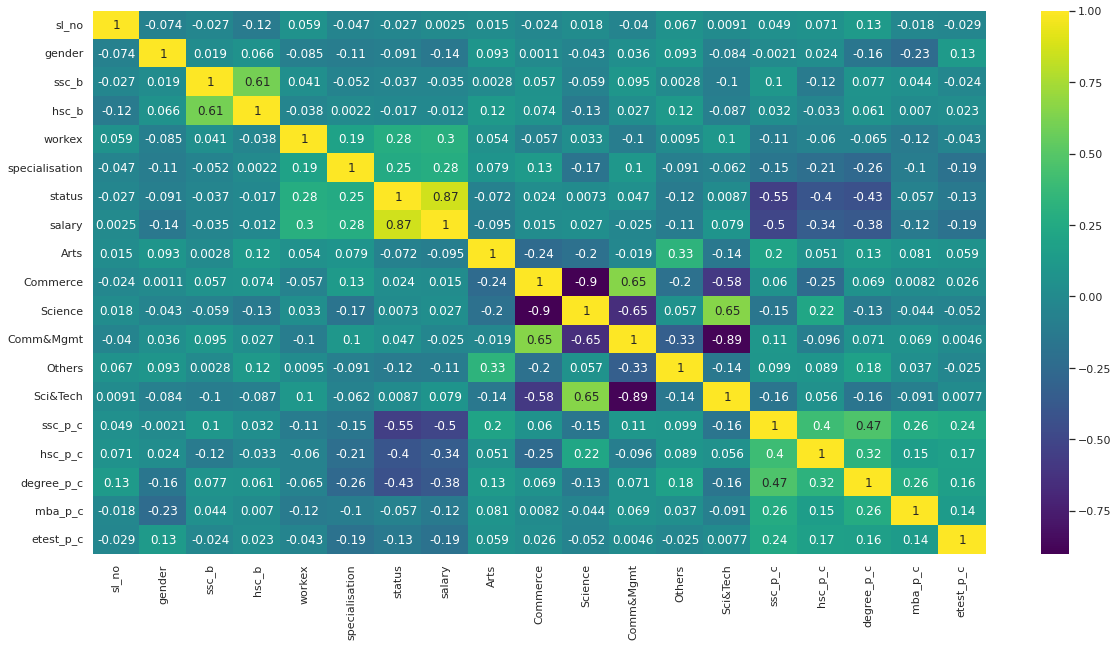

In [595]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='viridis')

In [596]:
unn_feat=['sl_no','ssc_b','hsc_b','salary']

for feat in unn_feat:
    df.drop(feat,axis=1,inplace=True)

In [597]:
df.isna().any()

gender            False
workex            False
specialisation    False
status            False
Arts              False
Commerce          False
Science           False
Comm&Mgmt         False
Others            False
Sci&Tech          False
ssc_p_c           False
hsc_p_c           False
degree_p_c        False
mba_p_c           False
etest_p_c         False
dtype: bool

In [598]:
from sklearn.model_selection import train_test_split

Y=df['status']
X=df.drop('status',axis=1)

In [599]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0,shuffle=True)

**KNN**

In [600]:
from sklearn.neighbors import KNeighborsClassifier

In [601]:
k=[5,6,7,8,9,10,11,12,13,14,15]
scores=[]
for val in k:
    knn=KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_train,y_train))
scores  

[0.8733333333333333,
 0.8466666666666667,
 0.86,
 0.8666666666666667,
 0.8533333333333334,
 0.86,
 0.8533333333333334,
 0.8666666666666667,
 0.8466666666666667,
 0.86,
 0.8333333333333334]

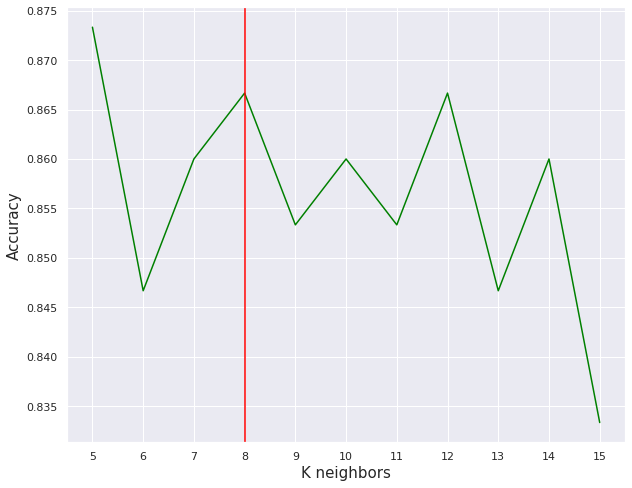

In [602]:
plt.figure(figsize=(10,8))
plt.plot(k,scores,color='green')
plt.xlabel('K neighbors',size=15)
plt.ylabel('Accuracy',size=15)
plt.xticks(np.arange(5,16))
plt.axvline(8,color='red')

In [603]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [604]:
y_pred_knn=knn.predict(X_test)

In [605]:
knn.score(X_test,y_test)

0.7692307692307693

<Figure size 720x576 with 0 Axes>

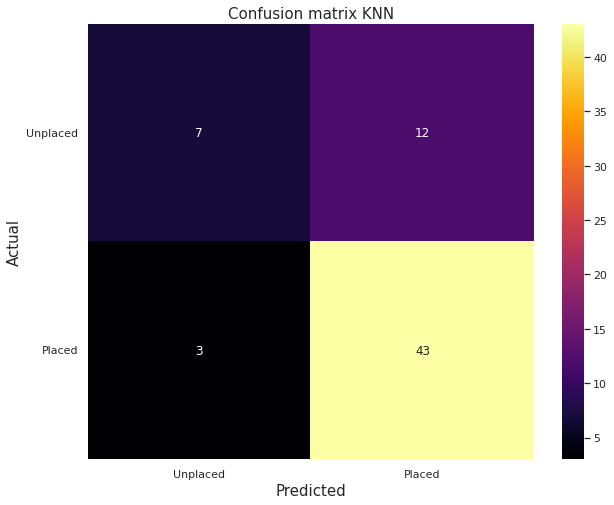

<Figure size 720x576 with 0 Axes>

In [606]:
from sklearn.metrics import confusion_matrix
labels=['Unplaced','Placed']
conf_mat_knn=confusion_matrix(y_test,y_pred_knn)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_knn,ax=ax,annot=True,cmap='inferno')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix KNN',size=15)
plt.figure(figsize=(10,8))

**RANDOM FOREST**

In [607]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = df.drop(columns='status').to_numpy()
y = df[['status']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [608]:
y.shape

(215,)

In [609]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [610]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 5.78 s, sys: 39.8 ms, total: 5.82 s
Wall time: 5.84 s


In [611]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'max_depth': 1, 'n_estimators': 40}",0.982609,1
4,"{'max_depth': 1, 'n_estimators': 50}",0.974275,2
0,"{'max_depth': 1, 'n_estimators': 10}",0.973913,3
1,"{'max_depth': 1, 'n_estimators': 20}",0.957246,4
2,"{'max_depth': 1, 'n_estimators': 30}",0.957246,4
6,"{'max_depth': 2, 'n_estimators': 20}",0.957246,4
7,"{'max_depth': 2, 'n_estimators': 30}",0.957246,4
5,"{'max_depth': 2, 'n_estimators': 10}",0.956884,8
8,"{'max_depth': 2, 'n_estimators': 40}",0.948551,9
9,"{'max_depth': 2, 'n_estimators': 50}",0.948551,9


In [612]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 2.43 s, sys: 17 ms, total: 2.44 s
Wall time: 2.44 s


In [613]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'n_estimators': 50, 'max_depth': 1}",0.974275,1
7,"{'n_estimators': 20, 'max_depth': 1}",0.957246,2
8,"{'n_estimators': 30, 'max_depth': 1}",0.957246,2
5,"{'n_estimators': 10, 'max_depth': 2}",0.956884,4
4,"{'n_estimators': 50, 'max_depth': 2}",0.948551,5
6,"{'n_estimators': 20, 'max_depth': 3}",0.931159,6
0,"{'n_estimators': 30, 'max_depth': 4}",0.906159,7
9,"{'n_estimators': 50, 'max_depth': 5}",0.905797,8
1,"{'n_estimators': 30, 'max_depth': 5}",0.888406,9
2,"{'n_estimators': 20, 'max_depth': 5}",0.888406,9


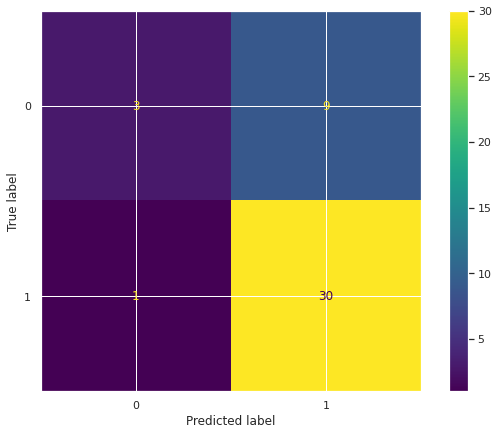

In [614]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [615]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.77      0.97      0.86        31

    accuracy                           0.77        43
   macro avg       0.76      0.61      0.62        43
weighted avg       0.76      0.77      0.72        43

